# 第一部分：作业简介  
一、姓名：曾媚  
二、学号：24210184  
三、文档介绍：这是数据分析的第一节课程，主要目的看学生是否成功安装好了Pyhton工具，进入第一次尝试。  
四、作业要求：  
   1、 添加一个Python代码，生成模拟数据：N = 500，包含 2 个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。存入一个名为 df 的数据框中。种子值为你的学号后三位。  
   2  完成数据分析任务，具体任务如下：  
     1）呈现 df 数据框的前 5 行。  
     2）呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度。  
     3）呈现 x1 的直方图。  
     4）在同一幅图中绘制 x1 和 x2 的密度函数图。  
     5）在同一幅图中绘制 x1 和 x2 的箱线图。  
     6）在同一幅图中绘制 x1 和 x2 的小提琴图。  
     7）计算 df 中 x1 和 x2 的相关系数，并输出结果。  
     8）绘制 x1 和 x2 的散点图，添加回归线和置信区间。    
五、提交：ex01_姓名.ipynb 文件   
      

In [2]:

# 生成模拟数据：N = 500，包含 2 个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。存入一个名为 df 的数据框中。种子值为你的学号后三位。  

import numpy as np
import pandas as pd

np.random.seed(184)
N = 500
means = [0, 3]
correlation = 0.4
std_devs = [1, 1.5]  
covariance = correlation * std_devs[0] * std_devs[1]

cov_matrix = [
    [std_devs[0]**2, covariance],
    [covariance, std_devs[1]**2]]

data = np.random.multivariate_normal(means, cov_matrix, N)

df = pd.DataFrame(data, columns=['x1', 'x2'])

## 第二部分：任务分析  
下面会依据上面的模拟数据生成对应的图标，实现数据分析

1、呈现 df 数据框的前 5 行。  
2、呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度。  
3、呈现 x1 的直方图。  
4、在同一幅图中绘制 x1 和 x2 的密度函数图。  
5、在同一幅图中绘制 x1 和 x2 的箱线图。  
6、在同一幅图中绘制 x1 和 x2 的小提琴图。 
7、算 df 中 x1 和 x2 的相关系数，并输出结果。  
8、绘制 x1 和 x2 的散点图，添加回归线和置信区间。  

***备注：每个任务前后都要有markdown来介绍总结***


###  任务1：呈现上面数据的前5行  

说明：将上面的数据展现前5行的数据  



In [6]:
#呈现上面的前5行数据  
print("数据基本统计信息：")
df.head(6)


数据基本统计信息：


,x1,x2
0,-0.614384,3.263149
1,-0.469053,2.196537
2,2.536873,5.207236
3,0.588425,1.879336
4,-1.372847,0.281165
5,-0.149420,4.236485


结论：从输出结果可以看出，df数据框的前5行包含了变量x1和x2的值，这有助于我们初步了解数据的情况。

###  任务2:呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度。  

说明：让代码自己选出这里的描述性数据：均值、标准差、中位数、最大值、最小值、偏度、峰度

In [3]:
# 呈现 df 的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度
stats = pd.DataFrame({
    '统计量': ['均值', '标准差', '中位数', '最大值', '最小值', '偏度', '峰度'],
    'x1': [df['x1'].mean(), df['x1'].std(), df['x1'].median(), 
           df['x1'].max(), df['x1'].min(), df['x1'].skew(), df['x1'].kurt()],
    'x2': [df['x2'].mean(), df['x2'].std(), df['x2'].median(), 
           df['x2'].max(), df['x2'].min(), df['x2'].skew(), df['x2'].kurt()]
})

stats.set_index('统计量', inplace=True)
print("\n描述性统计：")
print(stats.round(2))



描述性统计：
       x1    x2
统计量            
均值   0.04  3.14
标准差  1.04  1.49
中位数  0.08  3.12
最大值  3.16  7.12
最小值 -3.27 -2.24
偏度  -0.08 -0.11
峰度  -0.02  0.07


结论：从描述性统计数据可以看出，X1的均值接近0,x2的均值超过3，标准差不到1.5，与我们设定的参数相符。偏度均为负数，显示分布不是特别对称。

###  任务三：呈现 x1 的直方图  

说明：绘图 x1值方图  



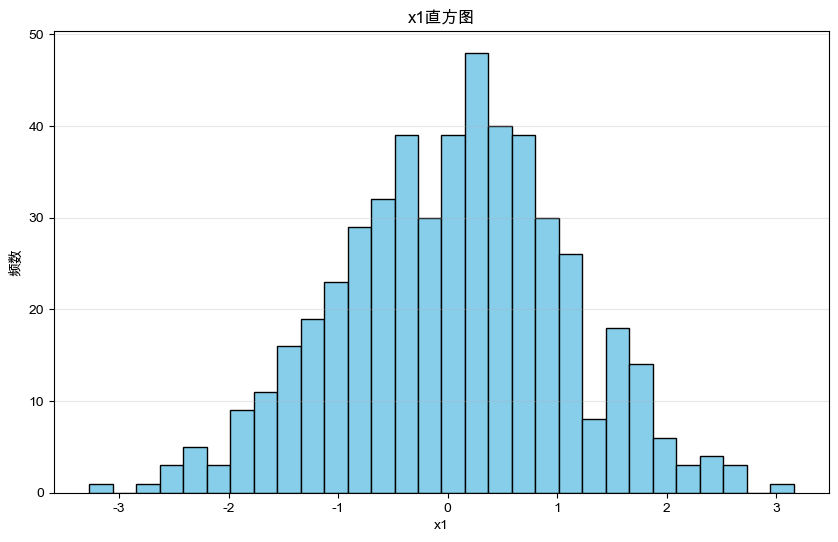

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'WenQuanYi Micro Hei', 'Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.hist(df['x1'], bins=30, color='skyblue', edgecolor='black')
plt.title('x1直方图')
plt.xlabel('x1')
plt.ylabel('频数')
plt.grid(axis='y', alpha=0.3)
plt.show()

结论：从直方图的分布可以看出，x1的值趋近于正态分布，这与我们设置的x1 ~ N(0, 1)相符。

###  任务四：在同一幅图中绘制 x1 和 x2 的密度函数图  

说明：绘图 x1和x2密度函数图，在同一幅图里，用不同的颜色表示x1和x2  



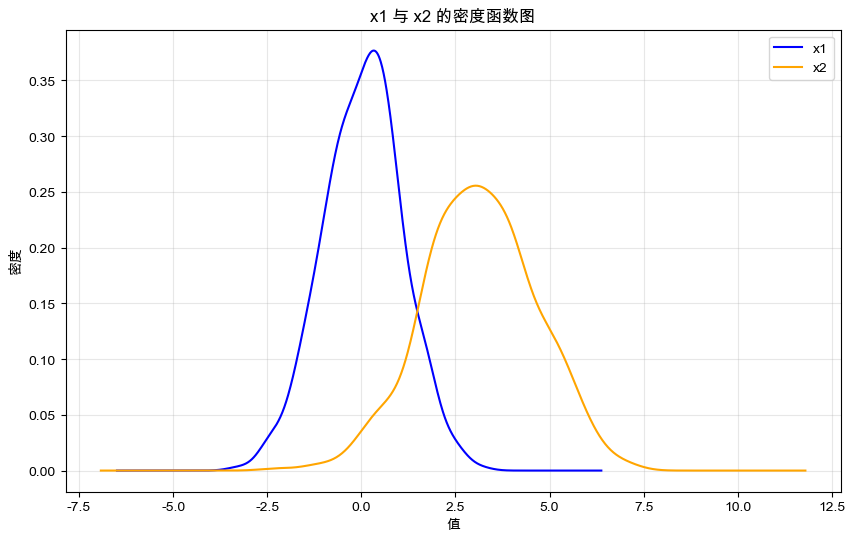

In [5]:
plt.figure(figsize=(10, 6))
df['x1'].plot(kind='kde', label='x1', color='blue')
df['x2'].plot(kind='kde', label='x2', color='orange')
plt.title('x1 与 x2 的密度函数图')
plt.xlabel('值')
plt.ylabel('密度')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

结论：从密度函数图可以看出，x1和x2的分布都接近正态分布，x1的中心位置在0附近，x2的中心位置在4附近，这与我们设定的参数相符。两条曲线的形状也反映了它们的标准差差异。

###  任务五：在同一幅图中绘制 x1 和 x2 的箱线图  

说明：绘图，x1和x2的箱线图

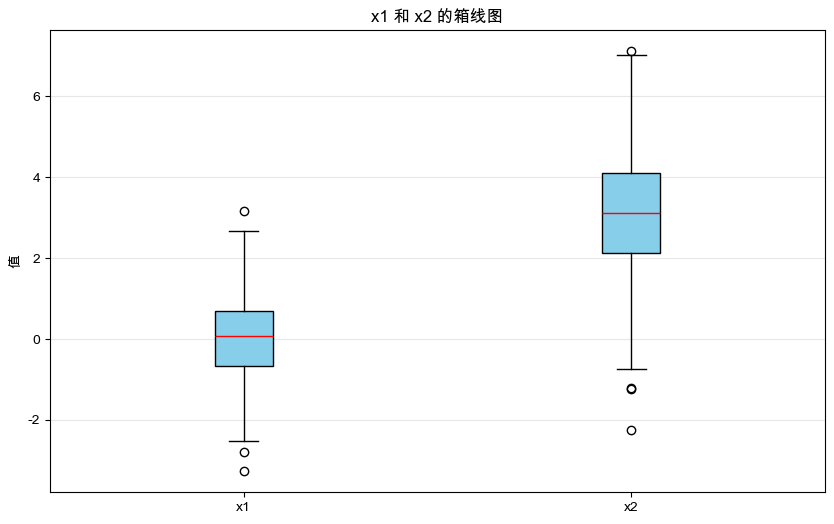

In [6]:

plt.figure(figsize=(10, 6))
plt.boxplot([df['x1'], df['x2']], tick_labels=['x1', 'x2'], patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('x1 和 x2 的箱线图')
plt.ylabel('值')
plt.grid(axis='y', alpha=0.3)
plt.show()

结论：从箱线图可以看出，x1和x2的中位数分别接近0和3，箱体的长度反映了数据的离散程度，x2的箱体较长，说明其标准差较大，这与我们设定的参数相符。箱线图还显示了数据的四分位数范围和异常值情况。

###   任务六 :在同一幅图中绘制 x1 和 x2 的小提琴图。

说明：绘图 x1和x2的小提琴图

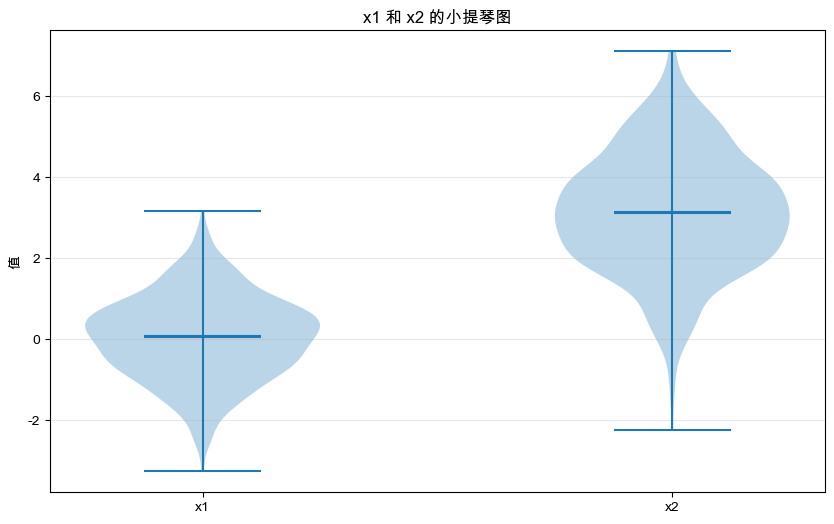

In [7]:
plt.figure(figsize=(10, 6))
plt.violinplot([df['x1'], df['x2']], showmeans=True, showmedians=True)
plt.xticks([1, 2], ['x1', 'x2'])
plt.title('x1 和 x2 的小提琴图')
plt.ylabel('值')
plt.grid(axis='y', alpha=0.3)
plt.show()

结论：小提琴图结合了箱线图和密度图的特点，从图中可以看出x1和x2的分布形状、中位数位置以及数据的离散程度。小提琴图的宽度表示数据在各个值上的密度，这有助于我们更全面地了解数据的分布情况。

###  任务七：计算 df 中 x1 和 x2 的相关系数，并输出结果

说明：计算相关系数

In [8]:
correlation = df['x1'].corr(df['x2'])
print(f"\nx1和x2的相关系数: {correlation:.4f}")



x1和x2的相关系数: 0.4030


结论：结论：计算得到的相关系数为0.4030，这与我们设定的corr(x1, x2) = 0.4相符，说明我们生成的模拟数据成功实现了预期的相关性。

###  任务八：绘制 x1 和 x2 的散点图，添加回归线和置信区间  

说明：绘制散点图，添加回归线和置信区间

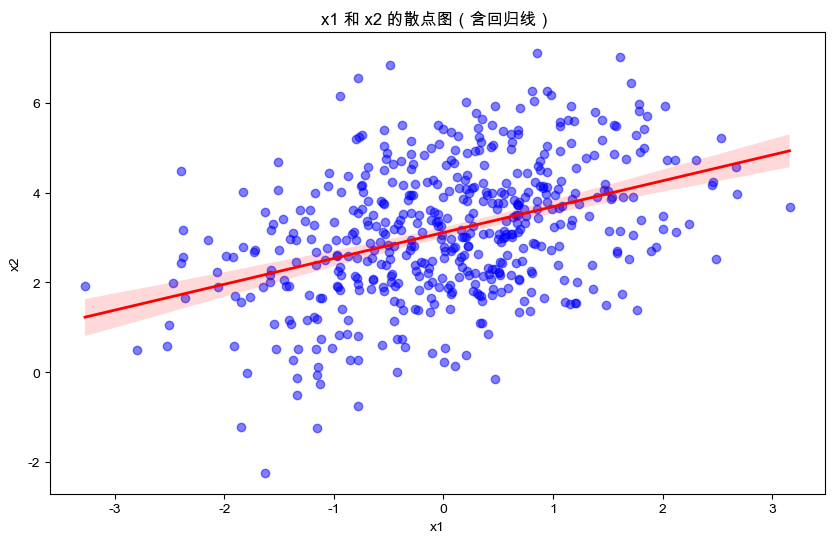

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    x='x1', y='x2', data=df,
    line_kws={'color': 'red', 'lw': 2},
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    ci=95  # 95%置信区间
)
plt.title('x1 和 x2 的散点图（含回归线）')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


结论：从散点图和回归线可以看出，x1和x2之间存在正相关关系，这与我们设定的相关系数为正相符。回归线的斜率表示这种正相关的程度，置信区间则表示我们对回归线的估计精度。